# Importation données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


df = pd.read_excel(r"C:\Users\21625\Desktop\projet data\Data-Preprocessing-Project-Imbalanced-Classes-Problem-master\german.xlsx")

# EDA

In [3]:
df.head()

,Solde du compte courant,Duree de credit (en mois),Historique des credits,Motif,Montant du credit,Compte d'épargne / obligations,Employé depuis,Statut personnel et sexe,Autres débiteurs / garants,Residence actuelle depuis,Age,Logement,Nombre de credits existants dans cette banque,Emploi,Nombre de personnes à charge,Statut
0,1,6,4,3,1169,5,5,3,1,4,67,2,2,3,1,1
1,2,48,2,3,5951,1,3,2,1,2,22,2,1,3,1,2
2,4,12,4,6,2096,1,4,3,1,3,49,2,1,2,2,1
3,1,42,2,2,7882,1,4,3,3,4,45,3,1,3,2,1
4,1,24,3,0,4870,1,3,3,1,4,53,3,2,3,2,2


In [4]:
df.shape

(1000, 16)

In [5]:
df['Statut'].value_counts()

1    700
2    300
Name: Statut, dtype: int64

In [6]:
df['Statut'].value_counts()/np.float(len(df))

1    0.7
2    0.3
Name: Statut, dtype: float64

In [7]:
df.isna().sum()


Solde du compte courant                          0
Duree de credit (en mois)                        0
Historique des credits                           0
Motif                                            0
Montant du credit                                0
Compte d'épargne / obligations                   0
Employé depuis                                   0
Statut personnel et sexe                         0
Autres débiteurs / garants                       0
Residence actuelle depuis                        0
Age                                              0
Logement                                         0
Nombre de credits existants dans cette banque    0
Emploi                                           0
Nombre de personnes à charge                     0
Statut                                           0
dtype: int64

In [8]:
df.Age.describe()


count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

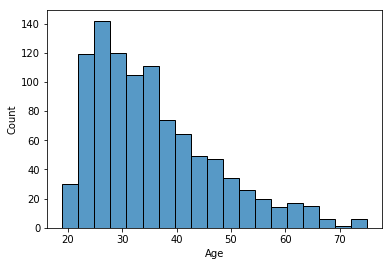

In [9]:
import seaborn as sn
sn.histplot(df.Age)


In [10]:
df['Statut personnel et sexe'].value_counts()


3    548
2    310
4     92
1     50
Name: Statut personnel et sexe, dtype: int64

C:\Users\21625\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


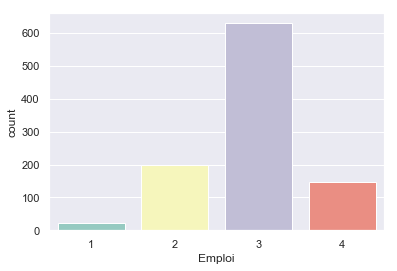

In [11]:
sn.set_theme(style="darkgrid")
ax = sn.countplot(df.Emploi, palette="Set3")

# Modéles avant equilibrage

In [12]:
X = df.drop(['Statut'], axis=1)
y = df['Statut']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [14]:
x=scaler.fit(X)

In [15]:
# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression(max_iter=2000)


# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)


# predict on the training data
y_pred = clf.predict(X)


In [16]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 75.70%


In [17]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[635  65]
 [178 122]]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [19]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
lr_score = lr1.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))

Test Accuracy of LR Algorithm: 73.00%


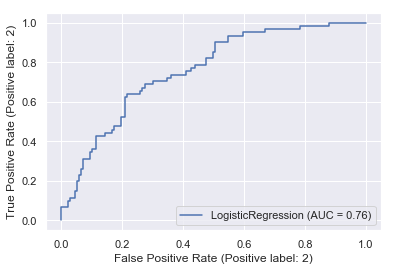

In [20]:
from sklearn import  metrics
metrics.plot_roc_curve(lr1, X_test, y_test) 
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train, y_train)
dtc_score = dtc1.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 65.50%


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf1.fit(X_train, y_train)
rf_score = rf1.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 78.50%


In [23]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
nb_score = nb1.score(X_test,y_test)
print("Test Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Test Accuracy of Naive Bayes: 72.50%


In [24]:
from sklearn import svm

#Create a svm Classifier
clf1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)
clf_score = clf1.score(X_test,y_test)
print("Test Accuracy of SVM: {:.2f}%".format(clf_score*100))

Test Accuracy of SVM: 75.00%


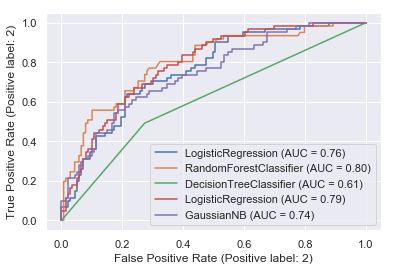

In [25]:
from sklearn.metrics import plot_roc_curve

classifiers = [lr1, rf1, dtc1,clf,nb1]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

#       Aprés equilibrage de deux classes 
Over-sampling is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points

In [26]:
from sklearn.utils import resample

In [27]:
df1 = df[df['Statut']==1]
df2 = df[df['Statut']==2]

In [28]:
df_minority_oversampled = resample(df2, replace=True, n_samples=700, random_state=0)      

In [29]:
df_oversampled = pd.concat([df1, df_minority_oversampled])

In [30]:
df_oversampled['Statut'].value_counts()

2    700
1    700
Name: Statut, dtype: int64

In [31]:
X1 = df_oversampled.drop(['Statut'], axis=1)
y1 = df_oversampled['Statut']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=45)

In [33]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train,y_train)
lr_score = lr2.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))

Test Accuracy of LR Algorithm: 66.79%


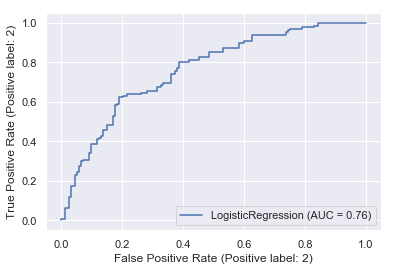

In [35]:
a=metrics.plot_roc_curve(lr2, X_test, y_test) 

plt.show()

In [36]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train, y_train)
dtc_score = dtc2.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 86.43%


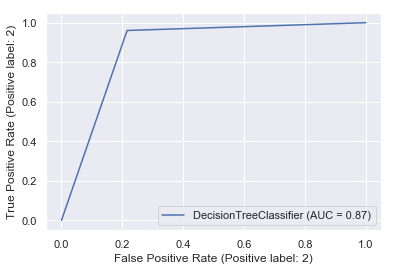

In [37]:
metrics.plot_roc_curve(dtc2, X_test, y_test) 
plt.show()

In [38]:
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf2.fit(X_train, y_train)
rf_score = rf2.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 90.71%


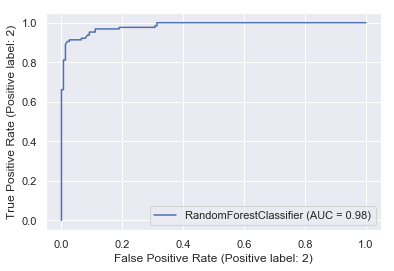

In [39]:
metrics.plot_roc_curve(rf2, X_test, y_test) 
plt.show()

In [40]:
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
nb_score = nb2.score(X_test,y_test)
print("Test Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Test Accuracy of Naive Bayes: 72.50%


In [41]:
#Create a svm Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)
nb_score = clf2.score(X_test,y_test)
print("Test Accuracy of SVM: {:.2f}%".format(nb_score*100))

Test Accuracy of SVM: 67.14%


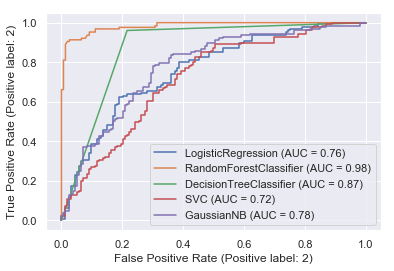

In [42]:
from sklearn.metrics import plot_roc_curve

classifiers = [lr2, rf2, dtc2,clf2,nb2]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

# Smote methode
In the context of synthetic data generation, there is a powerful and widely used method known as **synthetic minority oversampling technique** or **SMOTE**. Under this technique, artificial data is created based on feature space. 
Artificial data is generated with bootstrapping and k-nearest neighbours algorithm.  It works as follows:-


1.	First of all, we take the difference between the feature vector (sample) under consideration and its nearest neighbour.


2.	Then we multiply this difference by a random number between 0 and 1.


3.	Then we add this number to the feature vector under consideration.


4.	Thus we select a random point along the line segment between two specific features.


The concept of **SMOTE** can best be illustrated with the following figure:-


![smote.png](attachment:smote.png)


So, **SMOTE** generates new observations by interpolation between existing observations in the dataset.


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy='minority')

In [45]:
X_sm, y_sm = smote.fit_resample(X, y)

In [46]:
print(X_sm.shape[0] - X.shape[0], 'New points created under SMOTE')

400 New points created under SMOTE


In [47]:
y_sm.value_counts()

2    700
1    700
Name: Statut, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=45)

In [49]:
lr3 = LogisticRegression(max_iter=2000)
lr3.fit(X_train,y_train)
lr_score = lr3.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))

Test Accuracy of LR Algorithm: 76.07%


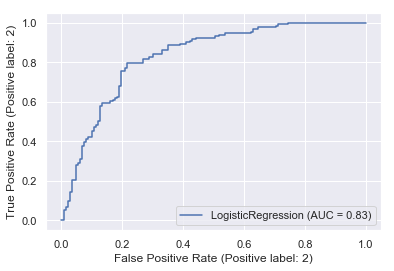

In [50]:
metrics.plot_roc_curve(lr3, X_test, y_test) 
plt.show()

In [51]:
dtc3 = DecisionTreeClassifier()
dtc3.fit(X_train, y_train)
dtc_score = dtc3.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 69.64%


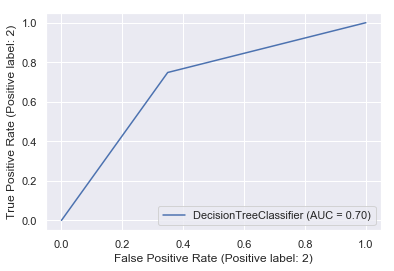

In [52]:
metrics.plot_roc_curve(dtc3, X_test, y_test) 
plt.show()

In [53]:
rf3 = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf3.fit(X_train, y_train)
rf_score = rf3.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 80.36%


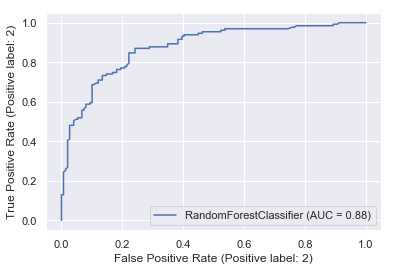

In [54]:
metrics.plot_roc_curve(rf3, X_test, y_test) 
plt.show()

In [55]:
#Create a svm Classifier
clf3 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf3.predict(X_test)
nb_score = clf3.score(X_test,y_test)
print("Test Accuracy of SVM: {:.2f}%".format(nb_score*100))

Test Accuracy of SVM: 76.07%


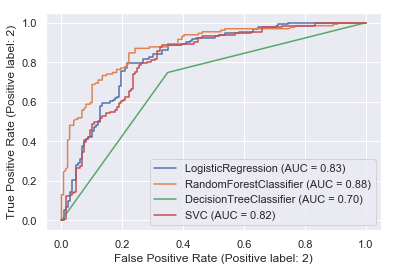

In [57]:
from sklearn.metrics import plot_roc_curve

classifiers = [lr3, rf3, dtc3,clf3]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

# Comparison de chaque Modéle

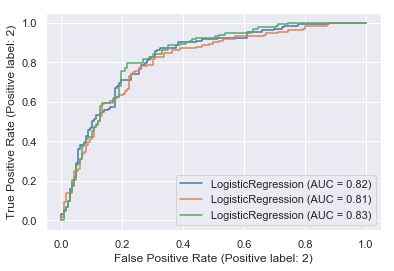

In [58]:
from sklearn.metrics import plot_roc_curve

classifiers = [lr1, lr2, lr3]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

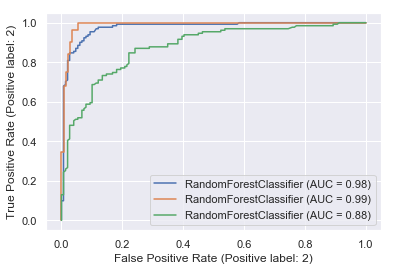

In [59]:
from sklearn.metrics import plot_roc_curve

classifiers = [rf1, rf2, rf3]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

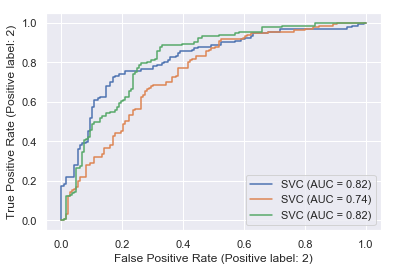

In [60]:
from sklearn.metrics import plot_roc_curve

classifiers = [clf1, clf2, clf3]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)